# On Analyzing Real World Time Series for Forecasting
Throughtout this notebook, we will do some preliminary investigations on time series datasets that come from real world problems. We'll begin by conducting exploratory data analysis and then begin developing our models.

## What Needs to be Done
- [ ] Map out system structure for performing our computations of interest
- [ ] Flush out a few models of interest so we can make forecast on real world data
- [ ] Develop the abstraction for our `Model` class that most models typically have when forecasting
- [ ] Figure out whether the data we're analyzing is stationary or not.
- [ ] Write support for `ARIMA` class of models.
- [ ] Revisit chapter 2 and add support for other quantities of interest to compute.

### Attributes:
1. data: A list or array-like structure storing the time series data points.
2. timestamps: A list or array-like structure that stores the timestamps for each data point. It could be dates, times, or simply indices.
3. frequency: A string or some identifier representing the frequency of data collection (e.g., 'daily', 'monthly').

### Methods:
5. decompose(): To decompose the time series into trend, seasonality, and residuals.
7. train_test_split(split_ratio): To split the data into a training and test set.
8. smoothing(method): Apply various smoothing techniques (e.g., moving average).

In [2]:
import numpy as np
import pandas as pd
from collections import namedtuple

from time_series import TimeSeriesFactory, UnivariateTimeSeries
from data_loader import build_airline_passenger_uts, build_stock_uts

## Abstract Model Class for Developing Concrete Models for Training and Inference

In [3]:
ap = build_airline_passenger_uts()

# Only grab stocks whose data is available for the entire time period
start_date, end_date = "2013-01-01", "2023-08-08"
Stock = namedtuple("Stock", ["symbol", "name"])
stocks = [
    ("^GSPC", "S&P 500"),
    ("AAPL", "Apple"),
    ("INTC", "Intel"),
    ("AMZN", "Amazon"),
    ("TSLA", "Tesla"),
    ("GOOGL", "Google")
]
stocks = [Stock(*s) for s in stocks]
stocks = {s.symbol: build_stock_uts(s.symbol, s.name, start_date=start_date, end_date=end_date) for s in stocks}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
values_cols = list(stocks.keys())
stock_mvts = TimeSeriesFactory.create_time_series(
    time_col="date",
    time_values=stocks[values_cols[0]].data.index,
    values_cols=values_cols,
    values=[stock.get_series() for stock in stocks.values()]
)

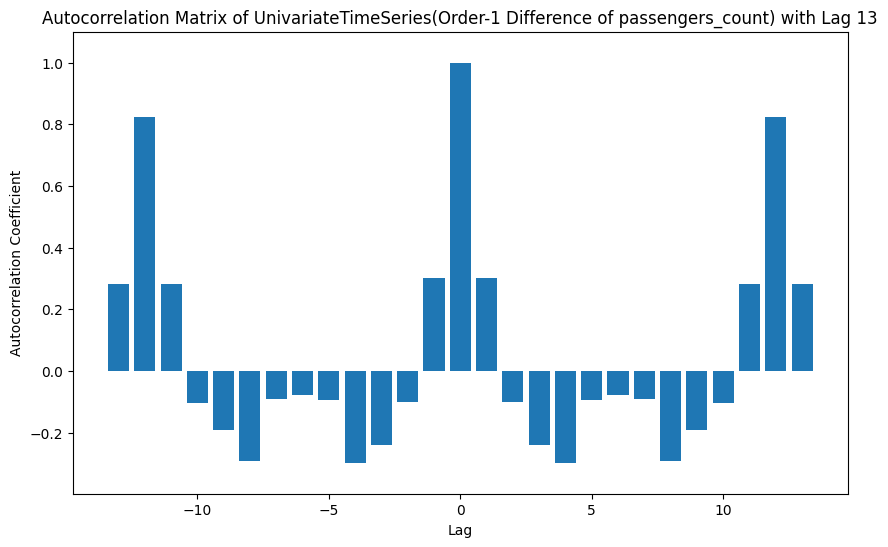

In [5]:
ap.get_order_k_diff(1).plot_autocorrelation(13, plot_full=True)

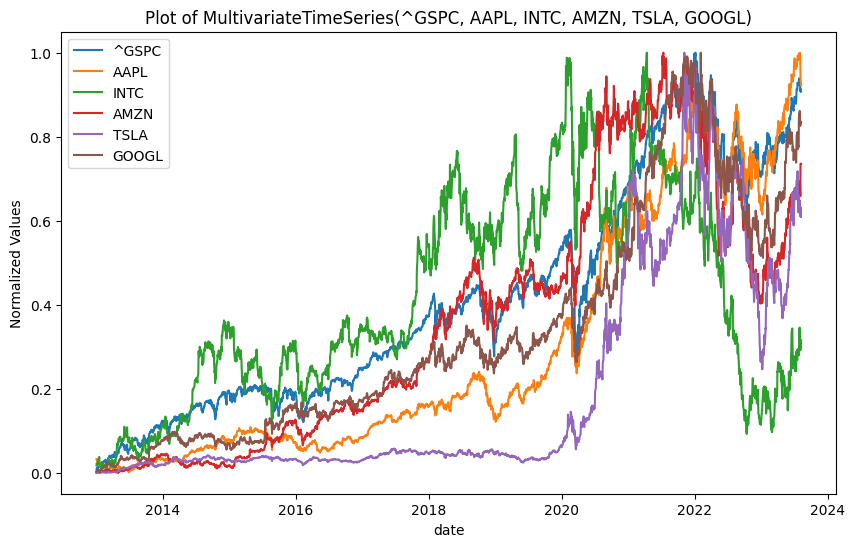

In [6]:
stock_mvts.plot()

## Air Passenger Dataset Investigations
Below, we visually see some seasonality in our data as well as some trend.

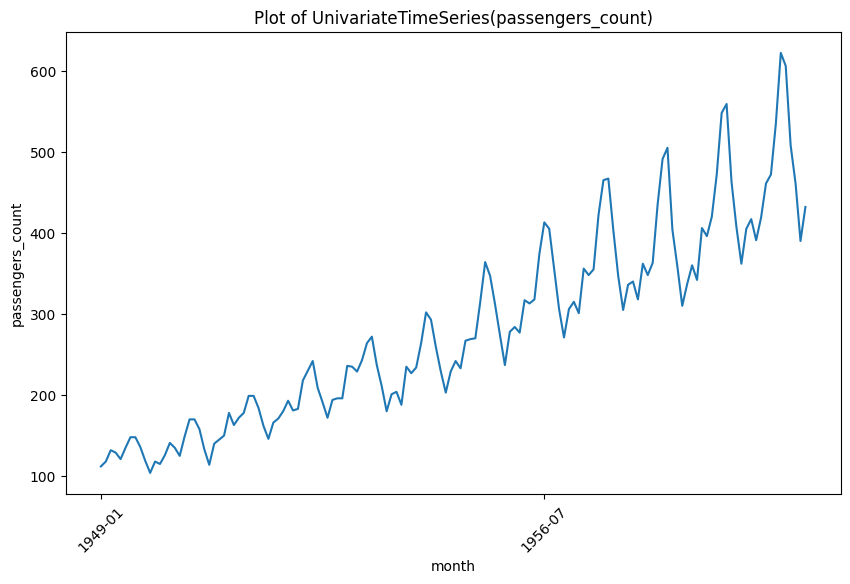

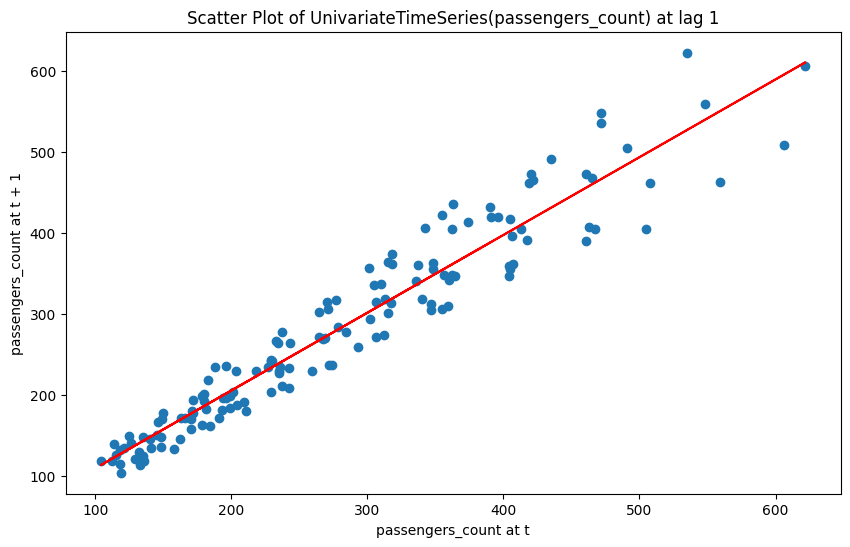

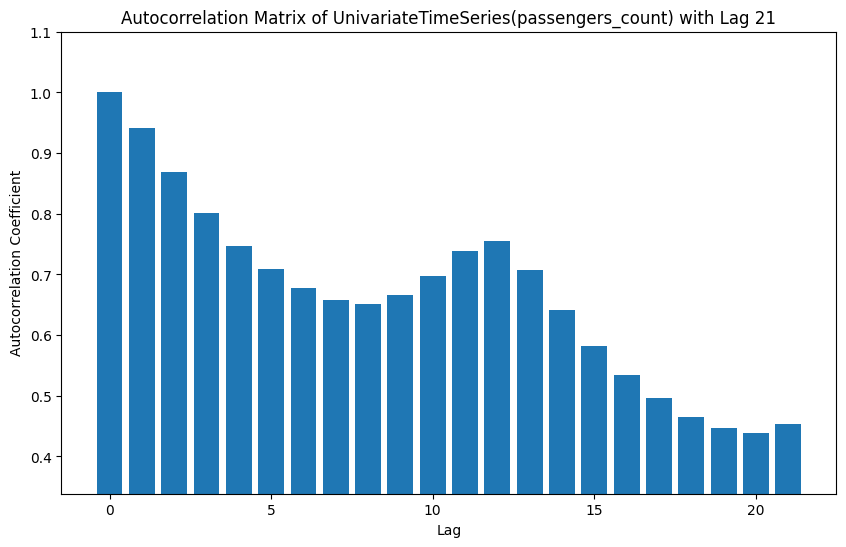

(None, None, None)

In [10]:
ap.plot(), ap.scatter_plot(), ap.plot_autocorrelation(max_lag=21)